## Sentiment Analysis on Drug Reviews

> *By Sneha Narayanan*

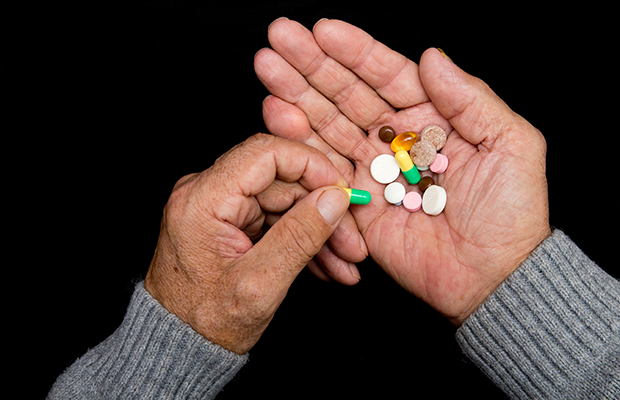

In [135]:
from IPython.display import Image
Image(filename='bth-adverse-drug-reactions-620x400.png')

In [134]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Enable inline plotting for Jupyter notebooks
%matplotlib inline  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [133]:
!pip install wordcloud

In [2]:
df = pd.read_csv('drugsComTrain.tsv', sep='\t')

In [3]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [137]:
print(df['condition'].value_counts())

In [5]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
df_train = df[(df['condition'] == 'Birth Control') | 
              (df['condition'] == 'Depression') | 
              (df['condition'] == 'High Blood Pressure') |
              (df['condition'] == 'Anxiety') |
              (df['condition'] == 'Diabetes, Type 2')] 

In [7]:
df_train.shape

(48636, 7)

In [8]:
df.shape

(161297, 7)

In [9]:
df_train = df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

# EDA

In [10]:
df_birth = df_train[df_train['condition'] == 'Birth Control']
df_dep = df_train[df_train['condition'] == 'Depression']
df_bp = df_train[df_train['condition'] == 'High Blood Pressure']
df_Anxiety = df_train[df_train['condition'] == 'Anxiety']
df_diab = df_train[df_train['condition'] == 'Diabetes, Type 2']

### WordCloud for Birth Control

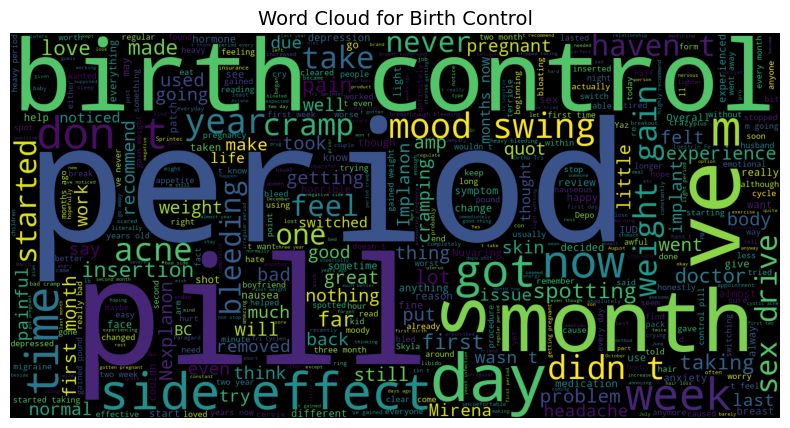

In [17]:
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(df_birth['review']))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud for Birth Control', fontsize=14)
plt.show()

### WordCloud for Depression

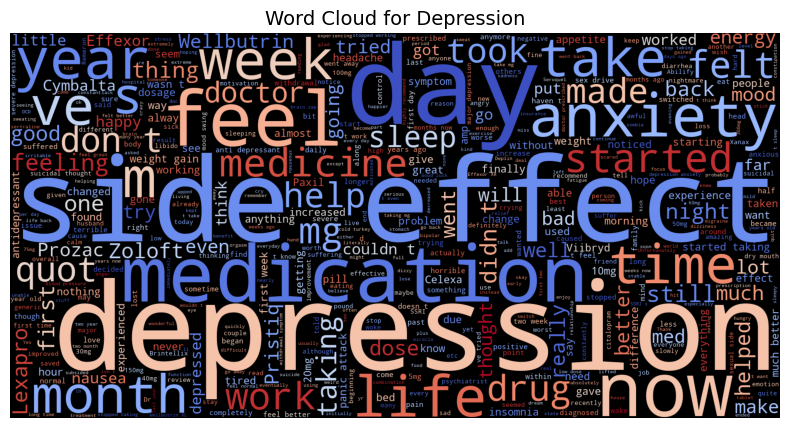

In [24]:
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=500, width=1600, height=800,colormap='coolwarm').generate(" ".join(df_dep['review']))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

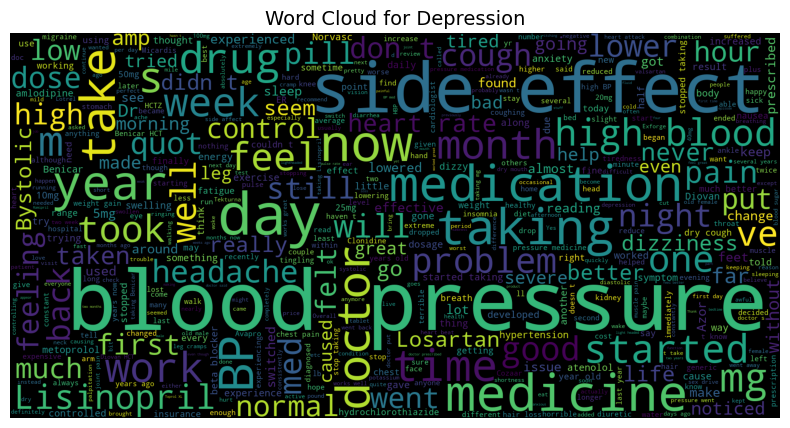

In [28]:
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(df_bp['review']))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

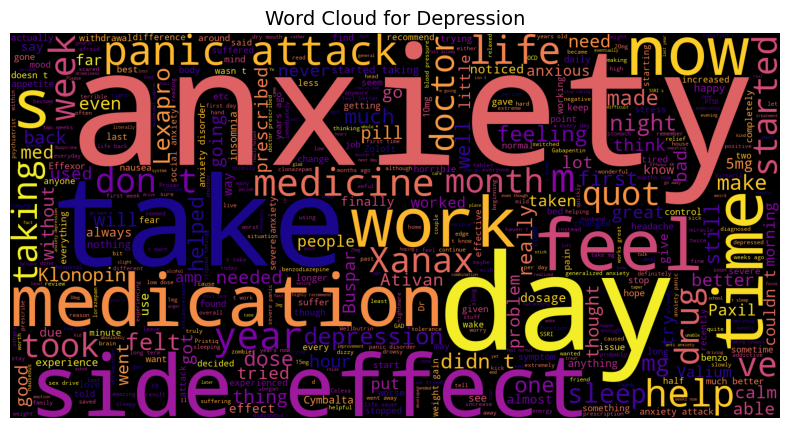

In [32]:
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=500, width=1600, height=800,colormap='plasma').generate(" ".join(df_Anxiety['review']))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

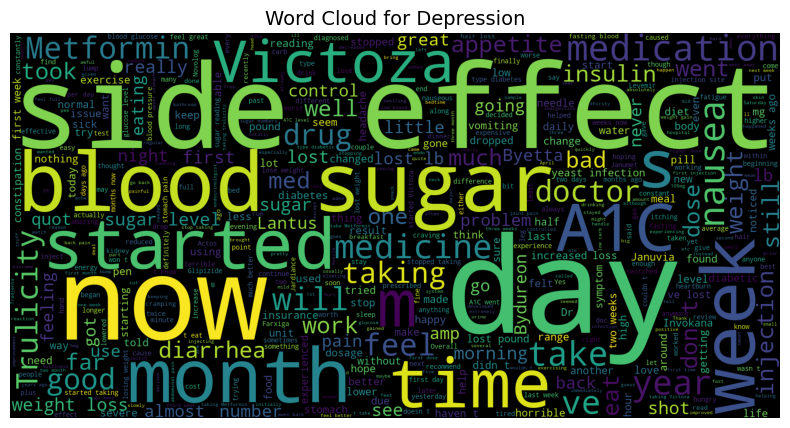

In [38]:
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(df_diab['review']))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

# Pre Processing

In [40]:
df_train.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [41]:
df_train['review'] = df_train['review'].str.replace('"', '')

In [ ]:
pd.set_option('display.max_colwidth', -1)

### Removing stop Words and Lemmetization

In [42]:
from nltk.corpus import stopwords

In [44]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/snehanarayanan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
lemmatizer = WordNetLemmatizer()

In [48]:
print("\nLemmatization Examples:")
print(lemmatizer.lemmatize("running", pos='v'))   
print(lemmatizer.lemmatize("better", pos='a'))    
print(lemmatizer.lemmatize("troubled", pos='v')) 


Lemmatization Examples:
run
good
trouble


In [49]:
from bs4 import BeautifulSoup
import re

def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    
    # 2. Remove non-alphabetic characters (keep only letters)
    letters_only = re.sub(r'[^a-zA-Z]', ' ', review_text)
    
    # 3. Convert to lowercase
    words = letters_only.lower().split()
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    meaningful_words = [w for w in words if w not in stop_words]
    
    # 5. Lemmatization (convert words to their base form)
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    
    # 6. Join words back into a single string
    return ' '.join(lemmatized_words)

In [50]:
df_train['clean_review']= df_train['review'].apply(review_to_words)

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_42741/2937209372.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [51]:
df_train.head()

,condition,review,clean_review
2,Birth Control,"I used to take another oral contraceptive, whi...",used take another oral contraceptive pill cycl...
3,Birth Control,This is my first time using any form of birth ...,first time using form birth control glad went ...
9,Birth Control,I had been on the pill for many years. When my...,pill many year doctor changed rx chateal effec...
11,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...
14,Birth Control,Started Nexplanon 2 months ago because I have ...,started nexplanon month ago minimal amount con...


# Data Modelling

In [52]:
X=df_train['clean_review']
y=df_train['condition']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

In [55]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

### Naive Bayes Model

In [56]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)


pred = mnb.predict(count_test)

print("Accuracy Score:", metrics.accuracy_score(y_test, pred))

Accuracy Score: 0.92578125


In [61]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes Type 2','Anxiety','High Blood Pressure'])

def plot_conf_matrix(cm, classes):
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

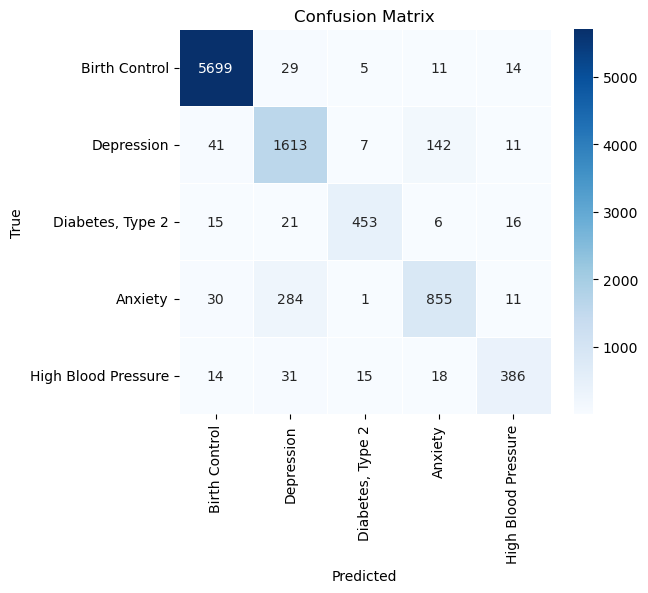

In [63]:
plot_conf_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2','Anxiety','High Blood Pressure'])

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)

pred = mnb_tf.predict(tfidf_test_2)

# Print accuracy
accuracy = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8555


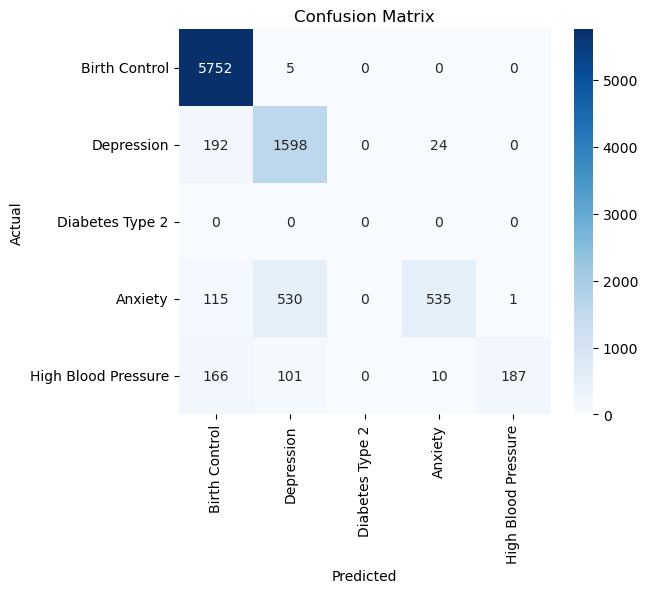

In [67]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes Type 2', 'Anxiety','High Blood Pressure'])

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes Type 2','Anxiety', 'High Blood Pressure'])

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize and train the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)

# Predict on test data
pred = pass_tf.predict(tfidf_test)

# Compute accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: {:.3f}".format(score))

Accuracy: 0.945


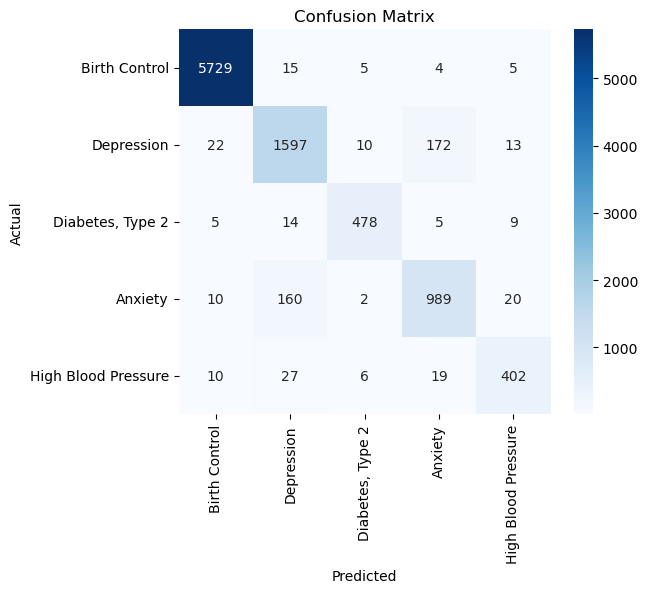

In [69]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'Anxiety','High Blood Pressure'])

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'Anxiety','High Blood Pressure'])

### Bigram

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the TF-IDF Vectorizer with n-gram range
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 2))

# Fit and transform the training data
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

# Predict on test data
pred = pass_tf.predict(tfidf_test_2)

# Compute accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: {:.3f}".format(score))

Accuracy: 0.957


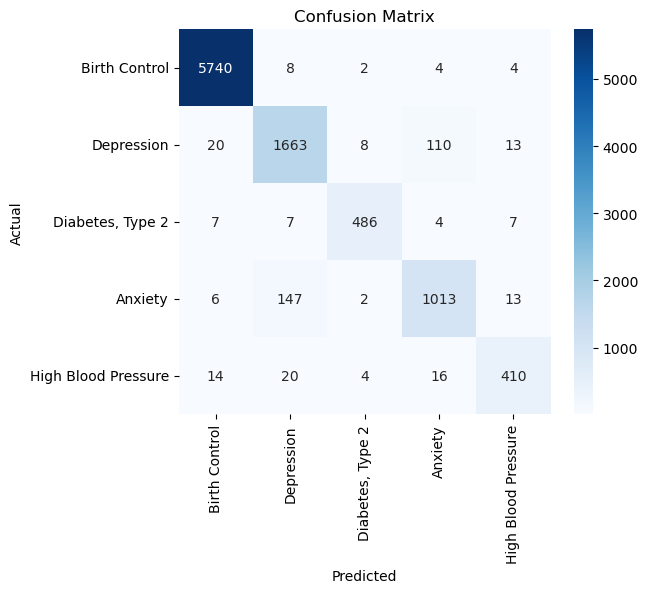

In [71]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'Anxiety','High Blood Pressure'])

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'Anxiety','High Blood Pressure'])

### TRI-GRAM

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the TF-IDF Vectorizer with n-gram range
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))

# Fit and transform the training data
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)

# Transform the test data
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

# Initialize and train the Passive Aggressive Classifier
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)

# Predict on test data
pred = pass_tf.predict(tfidf_test_3)

# Compute accuracy
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: {:.3f}".format(score))

Accuracy: 0.958


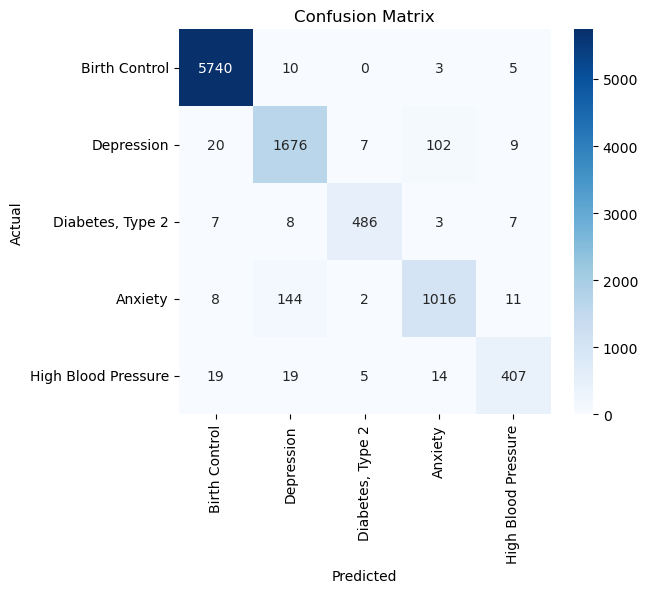

In [74]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2','Anxiety', 'High Blood Pressure'])

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2','Anxiety','High Blood Pressure'])


## Most Important Features

In [75]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    # Get the class index
    labelid = list(classifier.classes_).index(classlabel)
    
    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Sort the features by their coefficients and select the top n features
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    
    # Print the most informative features for the class
    for coef, feat in topn:
        print(f"{classlabel}: {feat} -> Coefficient: {coef}")

In [76]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control: affecting -> Coefficient: 0.4880588988192726
Birth Control: adhesive -> Coefficient: 0.4950819064258795
Birth Control: painless -> Coefficient: 0.509072304005805
Birth Control: ut -> Coefficient: 0.5573011485990881
Birth Control: utensil -> Coefficient: 0.5573011485990881
Birth Control: undergone -> Coefficient: 0.6250938891061253
Birth Control: abusive -> Coefficient: 0.6398095873820704
Birth Control: purging -> Coefficient: 0.6777482281500373
Birth Control: conplaints -> Coefficient: 1.1315041847871994
Birth Control: gizmo -> Coefficient: 7.5875264313176185


In [77]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression: dramamine -> Coefficient: 0.6650270966295457
Depression: dramatic -> Coefficient: 0.6838154952821186
Depression: sixteen -> Coefficient: 0.704751396956103
Depression: youself -> Coefficient: 0.7582613802842243
Depression: try -> Coefficient: 0.7897157082458062
Depression: strick -> Coefficient: 0.8847831886903763
Depression: assembly -> Coefficient: 0.9567580119525746
Depression: spiro -> Coefficient: 0.9955499674605184
Depression: simple -> Coefficient: 1.387668277831961
Depression: aligns -> Coefficient: 5.117001861655209


In [78]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure: drank -> Coefficient: 0.5036730167688295
High Blood Pressure: foremost -> Coefficient: 0.5067312837528165
High Blood Pressure: fresh -> Coefficient: 0.5108145908908848
High Blood Pressure: excruitating -> Coefficient: 0.5703329433599439
High Blood Pressure: excedrin -> Coefficient: 0.6299634799094433
High Blood Pressure: exceedingly -> Coefficient: 0.6367588778693377
High Blood Pressure: fusion -> Coefficient: 0.6569707151577083
High Blood Pressure: bayer -> Coefficient: 0.679414314609625
High Blood Pressure: sheen -> Coefficient: 0.7156614144526562
High Blood Pressure: garbapentin -> Coefficient: 1.2512546911721525


In [79]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Anxiety')

Anxiety: characterised -> Coefficient: 0.555973603676111
Anxiety: opium -> Coefficient: 0.5931094976566272
Anxiety: belief -> Coefficient: 0.5937077906740723
Anxiety: disassociation -> Coefficient: 0.7032829353987894
Anxiety: shin -> Coefficient: 0.7125688951509217
Anxiety: surprised -> Coefficient: 1.1298007055326023
Anxiety: sufficed -> Coefficient: 1.3798868519054943
Anxiety: swapping -> Coefficient: 1.4705800677734584
Anxiety: talked -> Coefficient: 1.7020976480649999
Anxiety: dented -> Coefficient: 1.9591042059979402


In [80]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2: blessed -> Coefficient: 0.3396418969455086
Diabetes, Type 2: blessing -> Coefficient: 0.3396418969455086
Diabetes, Type 2: orange -> Coefficient: 0.3398023687113864
Diabetes, Type 2: orangey -> Coefficient: 0.3398023687113864
Diabetes, Type 2: packaged -> Coefficient: 0.35461435137902175
Diabetes, Type 2: bdd -> Coefficient: 0.4255892034533241
Diabetes, Type 2: productively -> Coefficient: 0.4453434446732999
Diabetes, Type 2: opium -> Coefficient: 0.4603536695827905
Diabetes, Type 2: genuine -> Coefficient: 0.7572512528376858
Diabetes, Type 2: prioritize -> Coefficient: 2.708517812207288


## Sample Predictions

In [100]:
pd.set_option('display.width', None)  # Auto-width adjustment

In [103]:
print(df_train.tail(10))

                  condition  \
161269        Birth Control   
161270              Anxiety   
161271        Birth Control   
161273        Birth Control   
161276              Anxiety   
161278     Diabetes, Type 2   
161286           Depression   
161287              Anxiety   
161290  High Blood Pressure   
161291        Birth Control   

                                                   review  \
161269  When I first starting taking Lo Loestrin Fe, i...   
161270  I have been taking Cymbalta for 15 months now....   
161271  My experience: Painful insertion but I expecte...   
161273  I have had the Nexplanon since Dec. 27, 2016 \...   
161276  About 4 years ago I started having early-morni...   
161278  I just got diagnosed with type 2. My doctor pr...   
161286  This is the third med I&#039;ve tried for anxi...   
161287  I was super against taking medication. I&#039;...   
161290  I have only been on Tekturna for 9 days. The e...   
161291  This would be my second month on Junel. 

# Sample Prediction

In [117]:
text = ["I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects"]

test = tfidf_vectorizer.transform(text) 

pred1 = pass_tf.predict(test)

print(pred1[0])

Birth Control


# Sentiment Analysis

In [136]:
!pip install TextBlob

In [121]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    # Get polarity score: -1 (negative), 0 (neutral), 1 (positive)
    polarity = blob.sentiment.polarity
    # Classify sentiment
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [123]:
# Apply to your 'clean_review' column
df_train['sentiment'] = df_train['clean_review'].apply(get_sentiment)

In [126]:
# Check the result
df_train[['clean_review', 'sentiment']].head(20)

,clean_review,sentiment
2,used take another oral contraceptive pill cycl...,positive
3,first time using form birth control glad went ...,positive
9,pill many year doctor changed rx chateal effec...,positive
11,taken anti depressant year improvement mostly ...,positive
14,started nexplanon month ago minimal amount con...,positive
22,nexplanon job worry free sex thing period some...,positive
31,week zoloft anxiety mood swing take mg morning...,neutral
44,gp started venlafaxine yesterday help depressi...,negative
50,hey guy month since last post wanted give mont...,positive
59,never depo suppose b ideal candidate first mon...,positive


In [127]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def vader_sentiment(text):
    sentiment_score = sid.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [129]:
# Apply sentiment analysis to cleaned reviews
df_train['sentiment'] = df_train['clean_review'].apply(vader_sentiment)

In [130]:
# Check the result
print(df_train[['clean_review', 'sentiment']].head(20))

                                         clean_review sentiment
2   used take another oral contraceptive pill cycl...  positive
3   first time using form birth control glad went ...  positive
9   pill many year doctor changed rx chateal effec...  positive
11  taken anti depressant year improvement mostly ...   neutral
14  started nexplanon month ago minimal amount con...  positive
22  nexplanon job worry free sex thing period some...  negative
31  week zoloft anxiety mood swing take mg morning...  negative
44  gp started venlafaxine yesterday help depressi...  negative
50  hey guy month since last post wanted give mont...  positive
59  never depo suppose b ideal candidate first mon...  positive
60  med year worked fine great stopped panic attac...  negative
61  put yasmin month regulate cycle reduce acne fl...  positive
63  month sad say caused nothing self esteem becom...  positive
64  birth control considering getting pregnant use...  negative
67  medicine saved life wit end anti dep

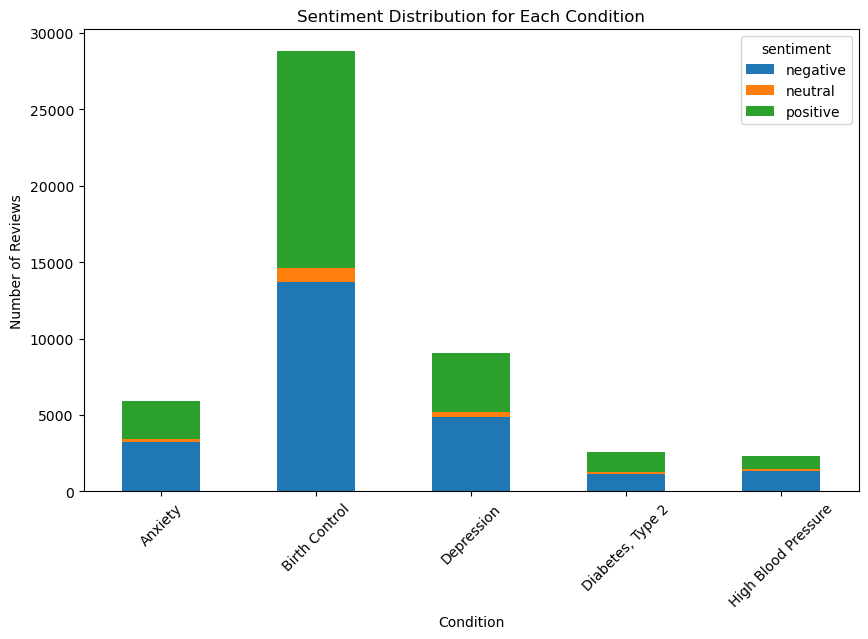

In [131]:
sentiment_by_condition = df_train.groupby(['condition', 'sentiment']).size().unstack().fillna(0)

# Plot the sentiment distribution for each condition
sentiment_by_condition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [132]:
# Group by condition and sentiment, then count the occurrences
sentiment_by_condition = df_train.groupby(['condition', 'sentiment']).size().unstack().fillna(0)

# Display the number of reviews for each sentiment and condition
print(sentiment_by_condition)

sentiment            negative  neutral  positive
condition                                       
Anxiety                  3213      222      2469
Birth Control           13726      866     14196
Depression               4854      337      3878
Diabetes, Type 2         1159      130      1265
High Blood Pressure      1315      153       853


> Negative reviews were 3.31% more prevalent than positive reviews, with both being significantly more common than neutral reviews